## 1.0 Business Understanding 
### 1 Overview  
In the modern insurance industry, personalized marketing and targeted offerings have become key to improving customer engagement, retention, and profitability.Customer segmentation involves dividing a customer base into distinct groups based on certain characteristics, behaviors, or needs. These segments can then be targeted with tailored marketing campaigns, products, and services that are more relevant to each group. By understanding and leveraging customer segments, insurance companies can better meet customer expectations, optimize pricing strategies, and improve overall customer satisfaction. 

The aim of this project is to explore and implement customer segmentation techniques using machine learning to segment insurance customers based on their attributes such as age, sex, smoking status, region, and insurance charges. The ultimate goal is to help insurance companies refine their marketing strategies, deliver personalized experiences, and enhance customer acquisition and retention.

### 2 Problem Statement
Insurance companies often face the challenge of providing personalized experiences to a diverse customer base. Without an understanding of different customer profiles, they might struggle to offer relevant policies, products, or services. This leads to missed opportunities for cross-selling, upselling, and customer retention. A one-unit approach to marketing may not be effective in addressing the distinct needs of various customer segments.

This project seek addresses the following:

1. How can we segment insurance customers into meaningful groups based on their demographic and behavioral characteristics?
2. How can we use these customer segments for more effective targeted marketing, which could ultimately lead to increased customer acquisition, retention, and profitability?

### 3 Challenges and Business Problem
With the growing number of insurance customers in the modern day, insurance companies are faced with the challenge of understanding the needs, expectations, characterististics, demographics and behaviors of every customer. And the consquence are the failure to retain the customers and losses. 

### 4 Objectives 
1. To segment insurance customers into distinct segments based on their demographic and behavioral characteristics 
2. Analyze the resulting clusters to identify key characteristics of each customer segment
3. Develop marketing strategies and recommendations based on the characteristics of each customer segment

### 5 Recommendation 

### 6 Conclusion 

## 2.0 Data Understanding 
The data for this project was sourced from Kaggle, a source for most data science datasets. 

This dataset has 1338 rows with 7 features as described below: 

***age***- age of the customer 

***sex***- gender of the customers 

***bmi***- body mass index. this feature could be important for assessing the health risks 

***childre***n- this represent  the number of children or dependents for each customer which can impact insurance premiums. 

***smoker***-smoking status of the customer.  Smoking is a major risk factor for health-related conditions like lung cancer, heart disease, and respiratory issues wchich can also affect the charges 

***region***-The region in which the customer resides. The region can influence insurance costs due to varying healthcare availability, lifestyle risks, and cost of living in different areas.

***charges***- The amount charged to the customer for their insurance coverage


## 3.0 Data Preperation 
This part of our project will involve the aspects of data loading, checking the general information of our dataset, data cleaning, preprocessing and feature engineering and understanding the statistical summary of the data. 

In [1]:
# import data loading, manipulation and visualization libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# import preprocessing libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

# import warnings 
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data and preview 
df=pd.read_csv("./data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are 1338 records and 7 features in our dataset

### 3.1 Checking for null values 

In [3]:
# check for null vaues 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

From the output above, our dataset is clean and therefore there are no missing/null values 

### 3.2 Checking for general information 

In [4]:
# check for information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows, 7 columns of which 4 are numerical and 3 are categorical. 

### 3.3 Statistical Summary 
The summary will give us the statistical distribution of our dataset such as mean, median, mode, quartiles, minimum and maximum and standard deviation.

In [5]:
# sumary 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The insurance daset have the age, bmi, children and charges as numeral features

### 3.4 Outliers 
The purpose of outlier detection is to identify the abnormal values that deviates from the rest of the values from a feature. 


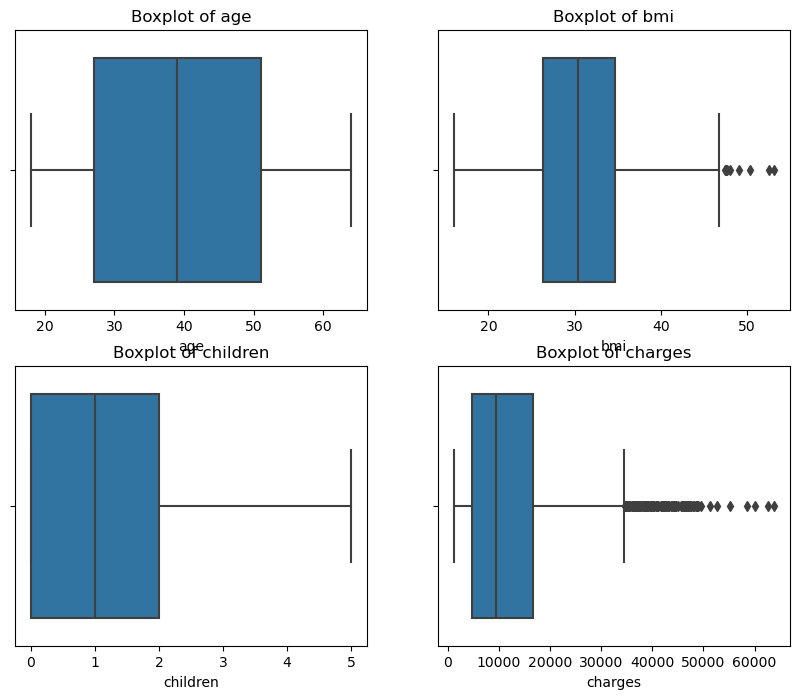

In [6]:
# define numerical features 
num_features = ["age", "bmi", "children", "charges"]
plt.figure(figsize=(10,8))
for i, feature in enumerate(["age", "bmi", "children", "charges"]):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}');


### Observation 
From our observation we can note the presence of outliers in charges and bmi features. 

In [7]:
# Remove outliers for charges
# define Q1, Q3 and IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR =   Q3-Q1

# calculate bounds 
lower_bound = Q1-1.5*IQR
upper_bound =Q3 +1.5*IQR
# remove the outliers for chargers 
df = df[(df['charges']>= lower_bound) & (df['charges']<=upper_bound)]

# remove outliers for bmi 

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR =   Q3-Q1

# remove 
df = df[(df['bmi']>= lower_bound) & (df['bmi']<=upper_bound)]

### 3.5 Preprocessing 
This stage involve seperating target variable from the rest of the features and carrying out preprocessing using pipeline on categorical and numerical features. 

In [8]:
# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Preprocessing pipeline for categorical and numerical columns
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# instantiate transformers for both numerical and categorical features 
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# preprocessor 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.0 Analysis (EDA)
Now that the data is cleaned and preprocessed, we will embark on analysis and visualization of different features. The key steps are: 

1. Visualize distributions of key features like age, BMI, charges.

2. Check for correlations between features to see if certain attributes relate to others.
 
3. Identify any patterns related to smoker, region, or sex that could help with segmentation.

### 4.1 Correlation 
This is to establish the relationships amongst the features. A correlation approaching positive one (1) means a strong positive correlation and on the other hand, a correlation approaching negative one(-1) means a strong negative relationship while a correlation value of zero (0) indicate a neutral correlation. 

The heatmap provides a quick way to visually assess how variables relate to each other in terms of linear relationships.

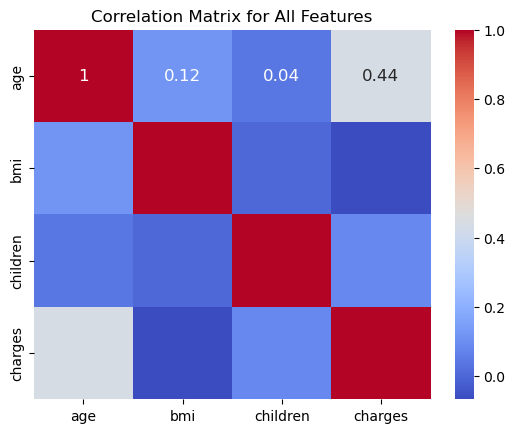

In [9]:
# Visualizing correlations of numerical features

corr_matrix= df[['age', 'bmi', 'children', "charges"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 12})
plt.title("Correlation Matrix for All Features")
plt.show()

#### Observation 
There’s a strong positive correlation between age and charges, suggesting that as age increases, medical charges tend to increase as well. This might indicate that older individuals generally have higher healthcare costs.

The correlation between children and bmi is close to 0, meaning there’s little to no linear relationship between these two variables. this means that changes in the number of children don’t seem to significantly affect BMI, at least in this dataset.

A correlation between age and bmi indicates a very weak positive correlation. While there may be a slight trend, it's not a strong relationship. 

### 4.2 Distribution of Charges 

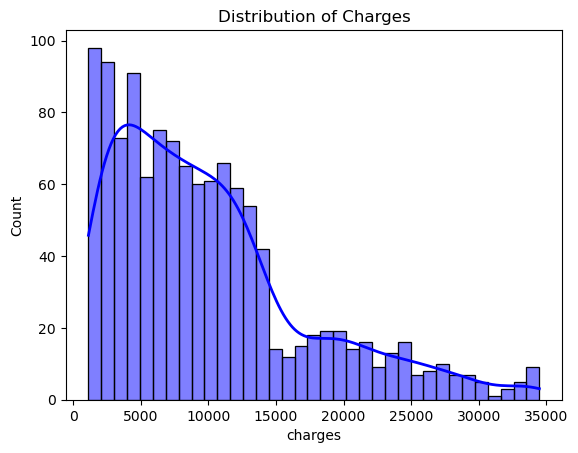

In [10]:
# Distribution of charges
sns.histplot(df['charges'], kde=True, bins=35, color = 'blue',  line_kws={'lw': 2})
plt.title("Distribution of Charges")
plt.show()

#### Observation 
This is a right-skewed, with the majority of values concentrated on the left side of the histogram. this means that majority of the insurance customers have relatively low healthcare charges, with a large number of data points clustered around the lower range. There is a long tail extending towards the right, indicating that a smaller proportion of individuals have significantly higher charges. The KDE curve further confirms this pattern, peaking at the lower values and gradually decreasing as charges increase.

Although majority of the people have moderate charges, there are few cases with high charges. This could be selective cases where some people have chronic conditions requiring them to pay more in order to receive speacilized treatment. 


### 4.3 Distribution for Categorical Features 
The distribution for categorical features is best illustrated using count plots. A count plot displays the count (or size) of each category in a categorical feature. It visually represents how many occurrences each unique value or category has in the dataset. This helps to easily identify the frequency distribution of categorical data, making it simple to spot patterns, imbalances, or trends across different categories. 

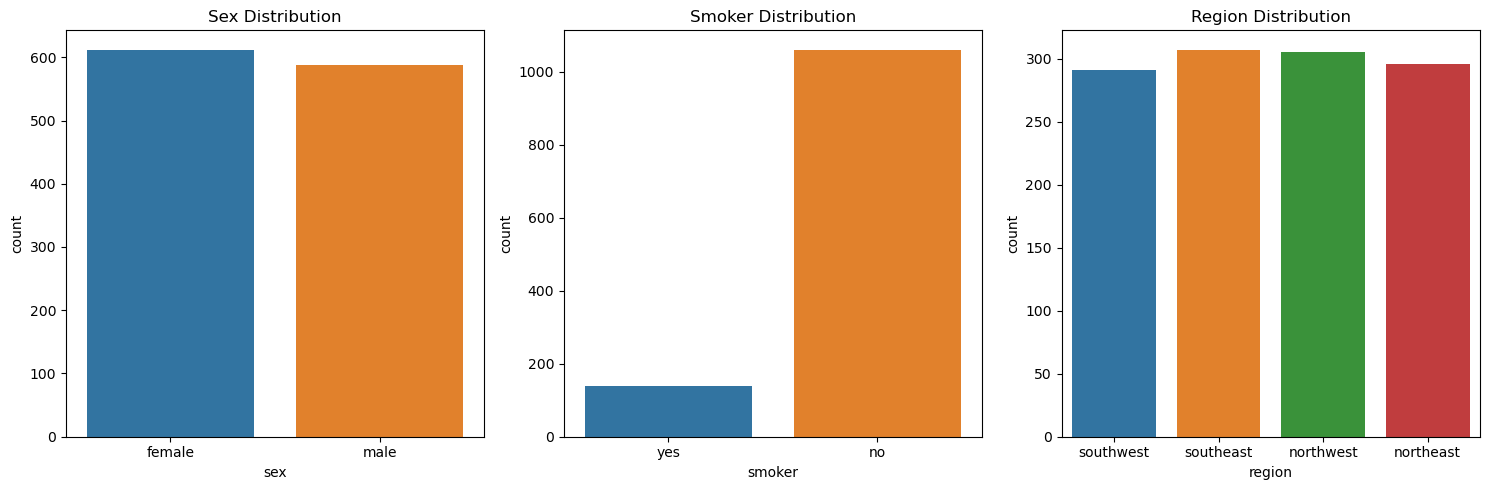

In [11]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first countplot on the first axis
sns.countplot(x='sex', data=df, ax=axes[0])
axes[0].set_title('Sex Distribution')

# Plot the second countplot on the second axis
sns.countplot(x='smoker', data=df, ax=axes[1])
axes[1].set_title('Smoker Distribution')

# Plot the third countplot on the third axis
sns.countplot(x='region', data=df, ax=axes[2])
axes[2].set_title('Region Distribution')

# Display the plot
plt.tight_layout()
plt.show()

#### Observation 
From the count plot illustration above, the distribution of customers in terms of sex is at par for both female and male. Majority of them are non smokers and are somehow evenly distributed accross all the four regions with southest slightly leading. 

## 5.0 Modeling 
This is the critical part of this project. Here, we will come up models based on our preprocessed dataset. Our first model will be trying to cluster insurance customers based on their demographic and behavioral characteristics. This is an unsupervised modeling using K-Means algorithm.  

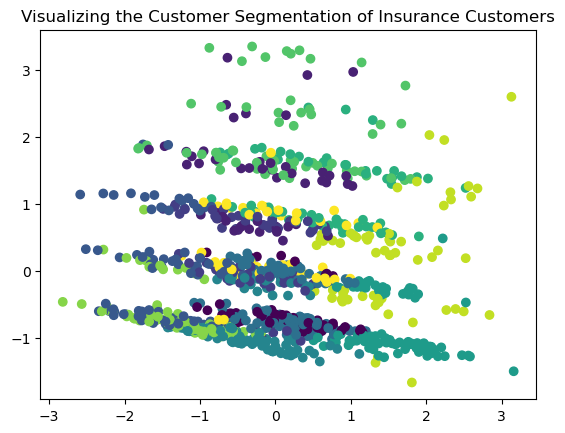

In [12]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# tranform the x_trained using the preprocessor
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train))

# initialize and fit model with train data
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(X_train_transformed)
y_kmeans = pd.Series(kmeans.predict(X_train_transformed))

# visualize clusters with PCA
pca = PCA(n_components = 2)
pca_output = pca.fit_transform(X_train_transformed)

plt.scatter(pca_output[:, 0], pca_output[:, 1], c=y_kmeans, cmap='viridis')
plt.title("Visualizing the Customer Segmentation of Insurance Customers")
plt.show()


### Interpreting Segments 
We can now carry out analysis of each segment

In [13]:
#convert the x_train array into a dataframe and append the y_kmeans labels  
X_train_transformed = pd.DataFrame(
    preprocessor.fit_transform(X_train),
    columns=preprocessor.get_feature_names_out()
)
X_train_transformed["y_kmeans"] = y_kmeans
X_train_transformed.head()

,num__age,num__bmi,num__children,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest,y_kmeans
0,-0.004862,-0.850680,1.569536,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7
1,0.712524,1.072862,1.569536,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7
2,-1.296158,1.541459,-0.896633,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5
3,-1.296158,-0.710593,0.747480,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,0.640786,-0.927688,-0.896633,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,11


Each customer has been assigned to a segment based on the features

### Finding cluster means. 

The purpuse is to determine the cluster mean for each segment guided by feature-values. To find the cluster means, first convert categorical comumns into numerical values. The numbers will be used in calculating the means in each cluster. 


In [14]:
# calculate means for each segments
segment_means = X_train_transformed.groupby('y_kmeans').mean()
print(segment_means)

          num__age  num__bmi  num__children  cat__sex_female  cat__sex_male  \
y_kmeans                                                                      
0         1.111570 -0.595069      -0.793876         0.000000       1.000000   
1        -0.713119  0.118032       1.420072         0.981818       0.018182   
2        -0.469276 -0.074615       0.228286         0.000000       1.000000   
3        -0.777488 -1.095834      -0.255429         0.990000       0.010000   
4         0.880110 -0.363140      -0.586677         1.000000       0.000000   
5        -1.086707  0.585628      -0.713138         0.750000       0.250000   
6         1.094627  1.178551      -0.654343         0.357895       0.642105   
7         0.897589 -0.074387       1.128724         0.956522       0.043478   
8        -0.072117 -0.198052       1.993409         0.031250       0.968750   
9        -1.182068 -0.612315      -0.757973         0.000000       1.000000   
10        0.048657  1.793677       0.590898         

The result is a dataframe with means of each cluster for the original data points 

### Validation 
Silhoute score is used to validate the results of the model. It measures how similar each point is to its own cluster compared to other clusters. It ranges from -1 to +1. 
+positive one means the point is well-matched to its own cluster and far from neighboring clusters while 0 means the point is on or very near the decision boundary between two clusters.
Negative 1 on the other hand is likely misclassified, as it is closer to points in other clusters than to its own

Silhouette Score: 0.3536066963318151


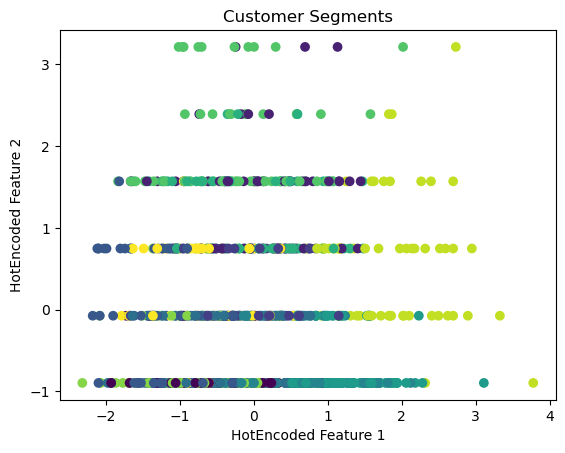

In [15]:
# import silhouette libray from sklearn
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette = silhouette_score(X_train_transformed, X_train_transformed['y_kmeans'])
print(f'Silhouette Score: {silhouette}')

# Visualizing the clusters
plt.scatter(X_train_transformed.iloc[:, 1], X_train_transformed.iloc[:, 2], c=X_train_transformed['y_kmeans'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('HotEncoded Feature 1')
plt.ylabel('HotEncoded Feature 2')
plt.show()

### Observation

Observation
After performing K-Means clustering on the dataset and evaluating the results using the Silhouette Score, we obtained a score of 0.276. This suggests that:
1. The data exhibits some clustering structure, but the separation between clusters is not strong.
2. There is overlapping between clusters, meaning some data points are close to multiple cluster boundaries.
3. The chosen number of clusters (k=12) may not be optimal, and further tuning might be required.

### Conclusion 
The moderate Silhouette Score indicates that while K-Means was able to identify some patterns in the data, the clustering is not highly distinct. To improve the results: we will tune our model with a GridsearCV technique to try and optimize our model. 

### GridSearchcv 

Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Best Silhouette Score: nan
Silhouette Score for the final model: 0.12223782975510027


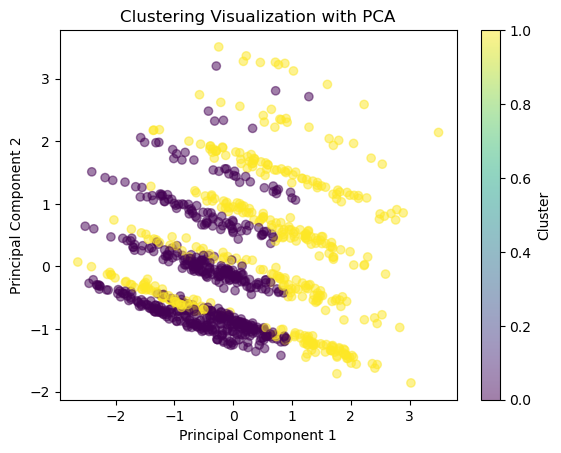

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)  # Predict cluster labels
    score = silhouette_score(X, labels)
    return score

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Number of clusters (k)
    'init': ['k-means++', 'random'],            # Initialization method
    'n_init': [10, 20],                         # Number of initializations
     # Maximum iterations
    'max_iter': [300, 500]
}

# Set up GridSearchCV with silhouette_score as the metric
grid_search = GridSearchCV(
    estimator=kmeans,
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer, greater_is_better=True),  
    cv=5,  # Cross-validation
    n_jobs=-1  # Use all available processors for faster computation
)

grid_search.fit(X_train_transformed)

# Print the best parameters and best Silhouette Score
print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

# Best KMeans model
best_kmeans = grid_search.best_estimator_


# Predict the clusters with the best model
X_train_transformed['y_kmeans'] = best_kmeans.predict(X_train_transformed)

# Compute the Silhouette Score for the final clustering model
sil_score_final = silhouette_score(X_train_transformed, X_train_transformed['y_kmeans'])
print(f"Silhouette Score for the final model: {sil_score_final}")

# Visualize the clusters using PCA (if desired)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_transformed)

# Scatter plot of clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_train_transformed['y_kmeans'].dropna(), cmap='viridis', alpha=0.5)
plt.title('Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Conclusion 
The final model (0.1222) performed worse than an earlier attempt (0.35360), showing a decrease in cluster quality. Both scores are relatively low, suggesting that the clustering is not very effective. We may therefore need to revisit the model's parameters or consider alternative clustering algorithms to improve the results. Nonetheless, ou rmodel is moderate and can be used meanwhile. 